### Group Members:

- Roberto Honegger, 16-715-419
- Name, matriculation number
- Name, matriculation number

# Assignment 2: Binary and Categorical Classification

For this assignment, we will use a similar two-layer network as Assignment 1 to implement binary and categorical classification using only `NumPy` package, without relying on `PyTorch` or any deep learning libraries.

We will implement Binary Cross Entropy Loss and Categorical Cross Entropy Loss and their gradient manually with efficient matrix computation, and evaluate accuracy for two classification tasks.  


## Theoretical Questions

We will build and train a two-layer network similar to Assignment 1.
Besides, we will apply **Logistic Function** ($\sigma$) on the logits for binary classification and **Stable Softmax Function** ($\tilde{\mathcal S}$) on the logits for categorical classification.

Questions in this section concern:

1. Comparison between normal softmax $\mathcal S$ and stable softmax $\tilde{\mathcal S}$
2. Compute derivative of $\tilde{\mathcal S}$ that should be applied in the coding section
3. Weight/Parameter Initialization
4. Discussion on Evaluation Metrics of classification tasks

### Task 1.1 Proof of Stable Softmax

The softmax function is defined as:

$$
\mathcal S(z_o) = \frac{e^{z_o}}{\sum\limits_{o'} e^{z_{o'}}}
$$

However, when $ z_o $ has large values, the exponential $ e^{z_o} $ may grow too large, leading to numerical instability (e.g., overflow issues).
To improve stability, we introduce the **stable softmax**:

$$
\tilde{\mathcal S}(z_o) = \frac{e^{z_o - z_{\max}}}{\sum\limits_{o'} e^{z_{o'} - z_{\max}}}
$$

where $z_{\max} = \max\limits_o z_o$.

Prove that stable softmax is mathematically equivalent to the original softmax function.

Discuss how stable softmax improves numerical stability, for instance, what will happen when $z_o$ is too large, or too small?

### Answer: 

####  Task 1.1 – Proof of Stable Softmax

The standard softmax is defined as:

$$
\mathcal S(z_o) = \frac{e^{z_o}}{\sum\limits_{o'} e^{z_{o'}}}
$$

The **stable softmax** is:

$$
\tilde{\mathcal S}(z_o) = \frac{e^{z_o - z_{\max}}}{\sum\limits_{o'} e^{z_{o'} - z_{\max}}}
$$

with \( z_{\max} = \max_o z_o \).

####  Proof of Equivalence

Using the identity \( e^{a - b} = \frac{e^a}{e^b} \), we get:

$$
\tilde{\mathcal S}(z_o) = \frac{e^{z_o}/e^{z_{\max}}}{\sum\limits_{o'} e^{z_{o'}}/e^{z_{\max}}}
= \frac{e^{z_o}}{\sum\limits_{o'} e^{z_{o'}}} = \mathcal S(z_o)
$$

Therefore, stable softmax is mathematically **equivalent** to the original softmax.

---

####  Why It Improves Stability

- If \( z_o \) is very large (e.g. 1000), then \( e^{z_o} \) can overflow.
- By subtracting \( z_{\max} \), the largest value becomes 0 → all exponentials are ≤ 1.
- This avoids overflow and keeps the computation **numerically stable**.



### Task 1.2 Derivative of Stable Softmax


Recall that in the lecture slides, when we compute gradient with respect to $w^{(1)}$ and $w^{(2)}$, as part of the chain rule, we replace $\frac{\partial\mathcal J^{[n]}}{\partial\mathcal y_o^{[n]}}\frac{\partial\mathcal y_o^{[n]}}{\partial\mathcal z_o^{[n]}}$ by $\frac{\partial\mathcal J^{[n]}}{\partial\mathcal z_o^{[n]}}$ when we choose a good activation function.

When normal softmax is applied, we have $\frac{\partial\mathcal J^{[n]}}{\partial\mathcal z_o^{[n]}} = y_o^{[n]} - t_o^{[n]}$. Prove that $\frac{\partial\mathcal J^{[n]}}{\partial\mathcal z_o^{[n]}}$ will return the same format when the activation function is stable softmax.



### Answer: 

####  Task 1.2 – Derivative of Stable Softmax

We want to prove that:

$$
\frac{\partial \mathcal{J}^{[n]}}{\partial z_o^{[n]}} = y_o^{[n]} - t_o^{[n]}
$$

holds **not only** for the regular softmax, but also for the **stable softmax**, where:

- \( y_o^{[n]} \) = output of softmax for sample \( n \)
- \( t_o^{[n]} \) = one-hot target
- \( z_o^{[n]} \) = logit for output \( o \)

---

####  Setup

Let’s define:

- Stable softmax:
  $$
  y_o = \tilde{\mathcal S}(z_o) = \frac{e^{z_o - z_{\max}}}{\sum_{j} e^{z_j - z_{\max}}}
  $$

- Cross-entropy loss:
  $$
  \mathcal{J} = - \sum_{o} t_o \log y_o
  $$

We want to compute the gradient:
\[
\frac{\partial \mathcal{J}}{\partial z_o}
\]

---

####  Step-by-Step Derivation

We apply the chain rule:

\[
\frac{\partial \mathcal{J}}{\partial z_o}
= \sum_{k} \frac{\partial \mathcal{J}}{\partial y_k} \cdot \frac{\partial y_k}{\partial z_o}
\]

We compute both parts:

1. **Loss gradient wrt output:**
\[
\frac{\partial \mathcal{J}}{\partial y_k} = -\frac{t_k}{y_k}
\]

2. **Softmax derivative (Jacobian):**
\[
\frac{\partial y_k}{\partial z_o} = y_k (\delta_{ko} - y_o)
\]

Now multiply:

\[
\frac{\partial \mathcal{J}}{\partial z_o} = \sum_k \left( -\frac{t_k}{y_k} \cdot y_k (\delta_{ko} - y_o) \right)
= \sum_k \left( -t_k (\delta_{ko} - y_o) \right)
\]

Breaking it up:

- For \( k = o \): \( -t_o (1 - y_o) \)
- For \( k \neq o \): \( -t_k (-y_o) = t_k y_o \)

Sum over all:

\[
\frac{\partial \mathcal{J}}{\partial z_o} = -t_o (1 - y_o) + \sum_{k \neq o} t_k y_o
= -t_o + t_o y_o + y_o \sum_{k \neq o} t_k
\]

But since \( \sum_k t_k = 1 \), we have:

\[
\sum_{k \neq o} t_k = 1 - t_o
\]

So:

\[
\frac{\partial \mathcal{J}}{\partial z_o}
= -t_o + t_o y_o + y_o (1 - t_o)
= -t_o + y_o (t_o + 1 - t_o)
= -t_o + y_o
= y_o - t_o
\]

 **Therefore:**

\[
\frac{\partial \mathcal{J}}{\partial z_o} = y_o - t_o
\]

This result **holds for both normal and stable softmax**, because their outputs \( y_o \) are **identical**, and only the internal computation differs (numerical stability).

---

###  Summary

- Stable softmax produces the same outputs as regular softmax
- Thus, the gradient of the cross-entropy loss w.r.t. logits is unchanged:
  \[
  \frac{\partial \mathcal{J}}{\partial z_o} = y_o - t_o
  \]
- This elegant result simplifies backpropagation and avoids the need to manually compute softmax + cross-entropy gradients separately


### Task 1.3 Weight Initialization

Why do we need to randomly initialize the weights before training starts?

1. Proof that a network with constantly initialized weights perform like a network with one hidden unit.
2. Show that gradient decent is not able to change this behavior and will keep all neurons in the hidden layer identical throughout training.

### Answer: 

####  Task 1.3 – Weight Initialization

---

###  Why Random Initialization?

If we initialize all weights to the **same value** (e.g., all zeros or all ones), then **every neuron in the same layer will behave identically** — both in forward and backward passes.

That means the network can't **break symmetry** and learn useful features. Random initialization is needed to give each neuron a chance to learn something different.

---

###  1. Constant Initialization = One Hidden Unit

Suppose we have a neural network with input \( x \in \mathbb{R}^n \), one hidden layer with \( m \) neurons, and output layer.

If all weights \( w^{(1)} \) in the hidden layer are initialized to the same value, say:

$$
w^{(1)}_1 = w^{(1)}_2 = \dots = w^{(1)}_m
$$

and all biases are the same:

$$
b^{(1)}_1 = b^{(1)}_2 = \dots = b^{(1)}_m
$$

Then during the **forward pass**, each hidden neuron computes the same:

$$
z_i = w^{(1)} \cdot x + b^{(1)} \quad \text{for all } i
$$

So all neurons in the hidden layer output the same activation:

$$
a_i = \phi(z_i) = \phi(w^{(1)} \cdot x + b^{(1)})
$$

 This makes the hidden layer act like **just one neuron repeated multiple times** — effectively, the network **collapses to one hidden unit**.

---

###  2. Why Gradient Descent Can’t Fix It

Let’s look at the **backpropagation step**:

During backprop, the update for each hidden neuron depends on:

$$
\Delta w^{(1)}_i \propto \frac{\partial \mathcal{J}}{\partial w^{(1)}_i}
$$

But since:

- All hidden neurons have the **same input**
- All neurons compute the **same output**
- The gradients will also be **identical**

That means:

$$
\Delta w^{(1)}_1 = \Delta w^{(1)}_2 = \dots = \Delta w^{(1)}_m
$$

So even after the update step, all weights **stay the same**.

 Therefore, **gradient descent cannot break the symmetry**, and the network will continue behaving as if it has **only one unique hidden unit**.

---

###  Summary

- Constant initialization leads to **identical neurons** in the hidden layer
- This results in the network behaving like it has only **one hidden unit**
- Gradient descent **cannot break** this symmetry
- That’s why **random initialization** is essential: to let neurons learn **different features**


### Task 1.4 Evaluation Metrics

If a binary classifier achieves an accuracy greater than 90%, see example plot in the OLAT, does this always indicate good performance? Might high accuracy in this binary classification be misleading? 

What alternative evaluation approaches could better capture model performance in such scenarios?



Answer: 

###  Task – Accuracy Above 90%: Is It Always Good?

No, achieving over 90% accuracy in binary classification **does not always indicate good model performance**.

####  Why Accuracy Can Be Misleading

In **imbalanced datasets**, where one class is much more frequent than the other, a model can achieve high accuracy by simply predicting the majority class all the time.

**Example:**
- 95% of samples are class 0 (negative)
- 5% are class 1 (positive)

A model that **always predicts class 0** will achieve 95% accuracy — but it **completely fails** to detect class 1.

---

####  Better Evaluation Metrics

To capture model performance more reliably in such scenarios, consider:

- **Precision**: How many predicted positives are actually correct?
  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]

- **Recall (Sensitivity)**: How many actual positives did we correctly predict?
  \[
  \text{Recall} = \frac{TP}{TP + FN}
  \]

- **F1 Score**: Harmonic mean of precision and recall — balances both
  \[
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

- **Confusion Matrix**: Gives full insight into TP, FP, TN, FN
- **ROC Curve & AUC**: Shows model's ability to separate classes across thresholds

---

###  Summary

High accuracy might just mean the model is good at guessing the **majority class**, not that it understands the problem. Use **precision, recall, F1-score**, and **confusion matrix** to get a complete picture of model performance.


## Coding

**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, March 26, to be graded.</font>**

### Dataset

We will use two different datasets, the *churn* dataset https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset for a binary classification and the *winequality-red* dataset https://archive.ics.uci.edu/dataset/186/wine+quality for a categorical classification. Both datasets are available on the UCI Machine Learning repository.

The binary classification dataset contains features extracted from customers of a telecommunication company, which are classified as either churn or not.
The categorical classification dataset contains chemical measurements for seven distinct qualities of a Portuguese white wine.
In the former dataset, the class is indicated in the final column named "Churn", whereas for the latter, target information is provided in the last column named "quality."

Please run the code block below to download the data files.

In [55]:
import os
import zipfile
import urllib.request

# Download the two dataset files
dataset_files = {
    "churn_data.zip": "https://archive.ics.uci.edu/static/public/563/iranian+churn+dataset.zip",
    "winequality-red.csv": "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
}

for name, url in dataset_files.items():
    base, extension = os.path.splitext(name)  # Get file name without extension

    if os.path.exists(name):
        print(f"File '{name}' already exists. Skipping download.")
    else:
        # Download the file
        urllib.request.urlretrieve(url, name)
        print(f"Downloaded {name} successfully.")

    # Check if it's a zip file and if it has been extracted
    if extension == ".zip":
        extracted_file = os.path.join(base + ".csv")  # Expected extracted file name

        if not os.path.exists(extracted_file):
            with zipfile.ZipFile(name, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"Extracted {name} successfully.")

            # Rename the extracted file
            os.rename("Customer Churn.csv", extracted_file)
        else:
            print(f"File '{extracted_file}' already extracted. Skipping extraction.")


File 'churn_data.zip' already exists. Skipping download.
File 'churn_data.csv' already extracted. Skipping extraction.
File 'winequality-red.csv' already exists. Skipping download.


#### Task 2.1: Dataset Loading

The first task deals with the loading of the datasets.
When training networks in `NumPy`, all data needs to be stored as NumPy arrays.
The data should be split between input matrix $\mathbf X \in \mathbb R^{D\times N}$ and target matrix $\mathbf T \in \mathbb R^{O\times N}$.
We need to **add a bias neuron to the input** so that we have $\mathbf X \in \mathbb R^{(D+1)\times N}$


<!-- For the targets, we have to be more careful as there are differences w.r.t. the applied loss function.

*   For binary classification, we need $\mathbf T \in \mathbb R^{1\times N}$.
*   For categorical classification, we only need the class indexes $\vec t = [t^{[1]}, \ldots, t^{[N]}]$ to be in dimension $\mathbb N^N$. -->


Implement a function that returns both the input and the target data for a given dataset.

Note:

1. You can use `csv.reader()` to read the dataset, or rely on other methods such as `pandas`
2. Please note that in the wine dataset CSV file, all values are separated by `;`, whereas in the churn dataset, they are separated by `,`
3. For the wine dataset, convert 6 target values into a one-hot matrix so that the dimension is $\mathbb R^{6\times N}$. **Be aware that the target values in the wine dataset do not start at index 0.**

In [58]:
import numpy
import csv

def dataset(dataset_file="winequality-red.csv", delimiter=";"):
  # read dataset
  data = []
  with open(dataset_file, 'r') as f:
    reader = csv.reader(f, delimiter=delimiter)
    next(reader)  # skip header
    for row in reader:
      data.append([float(val) for val in row])

  print(f"Loaded dataset with {len(data)} samples")

  # Convert to NumPy array
  data = numpy.array(data).T  # shape: (features+1, N)

  # Get the input (data samples)
  X = data[:-1, :]  # exclude last row (targets)

  # Insert bias neuron (add a row of ones) to the input
  bias = numpy.ones((1, X.shape[1]))
  X = numpy.vstack((X, bias))  # shape: (D+1, N)

  if dataset_file == "winequality-red.csv":
    # target is in the last column and needs to be converted into one-hot format
    raw_targets = data[-1, :].astype(int)  # shape: (N,)
    class_count = 6
    min_label = 3
    T = numpy.zeros((class_count, X.shape[1]))
    for i, label in enumerate(raw_targets):
      T[label - min_label, i] = 1
  else:
    # target is in the last column and needs to be of type float
    T = data[-1:, :].astype(float)  # shape: (1, N)

  return X, T


#### Test 1: Assert Valid Outputs


1. For the churn data, we assure that all dimensions are correct and that class labels are in $\{0, 1\}$.

2. For the wine dataset, we make sure that the dataset is in the correct dimensions, i.e., $\mathbf X\in \mathbb R^{(D+1)\times N}$ and $\mathbf T \in \mathbb N^{O\times N}$. We verify that each sample in $\mathbf T$ has exactly one active class (one-hot encoding).

In [61]:
# Load datasets using the dataset function
X, T = dataset("churn_data.csv", ",")

# Assert checks for the churn dataset
assert X.shape[0] == 14, X.shape[0]
assert T.shape[0] == 1, T.shape[0]
assert numpy.all(T >= 0) and numpy.all(T <= 1)
assert T.dtype == numpy.float64

# Load wine dataset
X, T = dataset("winequality-red.csv", ";")

# Assert checks for the winequality-red dataset
assert X.shape[0] == 12, X.shape[0]
assert T.shape[0] == 6, T.shape[0]
# assert numpy.all(T >= 0) and numpy.all(T <= 1)
assert numpy.all(numpy.sum(T, axis=0) == 1), "Error: Some samples are not correctly one-hot encoded!" # ensures that each column sums to exactly 1
assert T.dtype == numpy.float64

Loaded dataset with 3150 samples
Loaded dataset with 1599 samples


#### Task 2.2: Split Training and Validation Data


The data should be split into 80% for training and 20% for validation. Implement a function that takes the full dataset $(X,T)$ and returns $(X_t, T_t, X_v, T_v)$ accordingly.

Write a function that splits off training and validation samples from a given dataset. **What do we need to assure before splitting?**


In [64]:
import numpy

def split_training_data(X,T,train_percentage=0.8):

  # Ensure the samples are shuffled before splitting
  N = X.shape[1]  # total number of samples
  indices = numpy.arange(N)
  numpy.random.shuffle(indices)

  # Apply the shuffle to both X and T
  X = X[:, indices]
  T = T[:, indices]

  # Compute the split index
  split_index = int(train_percentage * N)

  # split into 80/20 training/validation
  X_train = X[:, :split_index]
  T_train = T[:, :split_index]
  X_val = X[:, split_index:]
  T_val = T[:, split_index:]


  return X_train, T_train, X_val, T_val

#### Task 2.3: Input Data Normalization


Since the data is in different input regimes, we want to normalize the data.

Implement a function that normalizes all input data using the whitening method with given mean and standard deviation.
$$X_{norm} = \frac{X-\mu}{\sigma}$$
Compute the mean ($\mu$) and the standard deviation ($\sigma$) for your dataset.
Make sure that you handle the bias neuron $x_0$ correctly.
Finally, normalize your input data using the implemented function.

Note: Use `numpy.mean()` and `numpy.std()` with the correct dimensions.

In [115]:
import numpy

def normalize(X_train, X_val):
  # Compute statistics (exclude bias row → last row)
  mean = numpy.mean(X_train[:-1, :], axis=1, keepdims=True)  # shape: (D, 1)
  std = numpy.std(X_train[:-1, :], axis=1, keepdims=True)    # shape: (D, 1)

  # Ensure that the bias neuron is not normalized
  X_train_no_bias = (X_train[:-1, :] - mean) / std
  X_val_no_bias = (X_val[:-1, :] - mean) / std

  # Re-attach the bias row (which is all ones)
  bias_train = X_train[-1:, :]  # shape: (1, N)
  bias_val = X_val[-1:, :]

  X_train_normalize = np.vstack([X_train_no_bias, bias_train])
  X_val_normalize = np.vstack([X_val_no_bias, bias_val])

  return X_train_normalize, X_val_normalize



### Gradient Descent

To train a two-layer multi-output regression network, we need to implement some functions.
The network output is computed in three steps:

  * Compute network activation for a batch of inputs $\mathbf X$: $\mathbf A = \mathbf W^{(1)}\mathbf X$
  * Call the activation function element-wise: $\mathbf H = g(\mathbf A)$. Here, we rely on the $\tanh$ function. Assure that the hidden neuron bias $\mathbf H_{0,:}$ is set appropriately.
  * Compute the logits $\mathbf Z$ of the batch: $\mathbf Z = \mathbf W^{(2)}\mathbf H$.

#### Task 2.4: Activation of Output

In this task, we will implement the activation functions used in binary and categorical classification:  

1. Logistic Function (for Binary Classification)  
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

2. Stable Softmax Function (for Categorical Classification)
  $$
   \tilde{\mathcal S}(z_o) = \frac{e^{z_o - z_{max}}}{\sum\limits_{o'} e^{z_{o'} - z_{max}}}
   $$

In [119]:
import numpy

def logistic_function(z):
    # Logistic sigmoid function for binary classification
    return 1 / (1 + numpy.exp(-z))

def stable_softmax(z):
    # Stable softmax for multi-class classification
    # z shape: (O, N), where O = number of classes, N = number of samples
    z_max = numpy.max(z, axis=0, keepdims=True)  # max over output dimension
    exp_z = numpy.exp(z - z_max)
    softmax = exp_z / numpy.sum(exp_z, axis=0, keepdims=True)
    return softmax


#### Task 2.5: Network Implementation

Implement a multi-target network that computes the output matrix $\mathbf Y$ for a given input dataset $\mathbf X$ and given parameters $\Theta=(\mathbf W^{(1)}, \mathbf W^{(2)})$ using `numpy` operations. Use $\tanh$ as activation function between two layers.

The function should return both the output $\mathbf Y$ and the output of the hidden units $\mathbf H$ since we will need these in gradient descent. 
When applying binary cross entropy loss, we apply the logistic function $\sigma$ to the logits $\mathbf Z$ before returning it.
When applying categorical cross entropy loss, we apply stable softmax $\tilde{\mathcal S}$ to the logits $\mathbf Z$ before returning it.

In [121]:
import numpy

def Network(X, Theta, loss_type='bce'):
  W1, W2 = Theta

  # compute activation
  A = numpy.dot(W1, X)  # shape: (H, N)

  # compute hidden unit output
  H = numpy.tanh(A)     # apply tanh element-wise

  # add bias neuron to hidden layer (a row of ones)
  bias_row = np.ones((1, H.shape[1]))
  H = numpy.vstack([H, bias_row])  # shape: (H+1, N)

  # compute network output (logits)
  Z = numpy.dot(W2, H)  # shape: (O, N)

  # apply activation depending on the loss type
  if loss_type == 'bce':
    Y = logistic_function(Z)  # binary classification
  elif loss_type == 'cce':
    Y = stable_softmax(Z)     # categorical classification
  else:
    raise ValueError("Unknown loss_type. Use 'bce' or 'cce'.")

  return Y, H


#### Task 2.6: Loss Implementation

Implement a loss function that returns the Binary Cross-Entropy (BCE) loss for binary classification and the Categorical Cross-Entropy (CCE) loss for categorical classification.
Note that for BCE, $O=1$ so that both $\mathbf Y\in\mathbb R^{O\times N}$ and $\mathbf T\in\mathbb N^{O\times N}$ are considered as vectors.

$$
\mathcal J^{\mathrm{BCE}} = -\frac{1}{N} \left[ \mathbf T \log \mathbf Y + (1 - \mathbf T) \log (1 - \mathbf Y) \right] \vec{\mathbf 1}_N
$$

$$
\mathcal J^{\mathrm{CCE}} = -\frac{1}{N} \vec{\mathbf 1}_O^T [\mathbf T \log \mathbf Y] \vec{\mathbf 1}_N
$$

For both losses, the mathematical expressions above can be implemented much easier, by using basic `numpy` or `scipy` functionality.

In [123]:
import numpy as np

def loss(Y, T, loss_type):
  eps = 1e-12  # Small value to prevent log(0)

  if loss_type == 'bce':
    # Binary Cross Entropy: both Y and T are shape (1, N)
    Y = numpy.clip(Y, eps, 1 - eps)
    J = -numpy.mean(T * np.log(Y) + (1 - T) * np.log(1 - Y))
  
  elif loss_type == 'cce':
    # Categorical Cross Entropy: Y and T are shape (O, N)
    Y = numpy.clip(Y, eps, 1)  # Avoid log(0)
    J = -numpy.sum(T * np.log(Y)) / T.shape[1]

  else:
    raise ValueError("Unknown loss_type. Use 'bce' or 'cce'.")

  return J


#### Task 2.7: Gradient Implementation

Implement a function that computes and returns the gradient for a given batch $(\mathbf X, \mathbf T)$, the given network outputs $\mathbf Y$ and $\mathbf H$ as well as current parameters $\Theta=(\mathbf W^{(1)}, \mathbf W^{(2)})$.
Make sure to compute the gradient with respect to both weight matrices. Remember that we have used `tanh` as the activation function between two layers.
Implement the function using the fast version provided in the lecture and make use of `numpy` operations.

In [126]:
import numpy as np

def gradient(X, T, Y, H, Theta):
  W1, W2 = Theta
  N = X.shape[1]  # Number of samples

  # Derivative with respect to W2
  dZ = (Y - T) / N        # shape: (O, N)
  g2 = numpy.dot(dZ, H.T)    # shape: (O, H+1)

  # Backprop to hidden layer
  dH = numpy.dot(W2.T, dZ)   # shape: (H+1, N)

  # Remove bias row from H and dH
  H_no_bias = H[:-1, :]         # shape: (H, N)
  dH_no_bias = dH[:-1, :]       # shape: (H, N)

  # Derivative of tanh: 1 - tanh²(x)
  d_activation = 1 - H_no_bias**2

  # Element-wise product for chain rule
  dA = dH_no_bias * d_activation  # shape: (H, N)

  g1 = numpy.dot(dA, X.T)           # shape: (H, D+1)

  return g1, g2



#### Task 2.8: Accuracy Computation


Implement a function that computes the accuracy of the provided network output and the given target values.
Make sure that the implementation supports both binary as well as categorical targets.

In [128]:
import numpy

def accuracy(Y, T):
  # check if we have binary or categorical classification
  if Y.shape[0] == 1:
    # binary classification
    predictions = (Y > 0.5).astype(int)  # threshold at 0.5
    correct = (predictions == T).sum()
    total = T.shape[1]
    return correct / total
  else:
    # categorical classification
    predictions = numpy.argmax(Y, axis=0)  # index of max logit/prob
    targets = numpy.argmax(T, axis=0)      # one-hot to class index
    correct = (predictions == targets).sum()
    total = T.shape[1]
    return correct / total


#### Test 2: Test Accuracy Function


Design test data and according logit values with which you can test the correctness of your accuracy function.
Make sure that the accuracy will compute the correct values.
Test both binary and categorical accuracy.

In [130]:
# first, test binary classification
YY = numpy.ones((1,20)) * -5.
YY[0][15:20] = 5
assert(abs(accuracy(YY,numpy.zeros((1,20))) - 0.75) < 1e-8)
assert(abs(accuracy(YY,numpy.ones((1,20))) - 0.25) < 1e-8)

# now, test categorical classification with 4 classes
YY = numpy.ones((4, 20)) * -5  # Shape (C, N) to match function expectations
YY[0, 0:1] = 5
YY[1, 1:4] = 5
YY[2, 4:10] = 5
YY[3, 10:20] = 5
# Modify YY and T to be one-hot encoded
T0 = numpy.eye(4)[numpy.zeros(20, dtype=int)].T
T1 = numpy.eye(4)[numpy.ones(20, dtype=int)].T
T2 = numpy.eye(4)[numpy.ones(20, dtype=int) * 2].T
T3 = numpy.eye(4)[numpy.ones(20, dtype=int) * 3].T
T4 = numpy.eye(4)[numpy.array([0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])].T

# Assertions with modified inputs
assert abs(accuracy(YY, T0) - 0.05) < 1e-8
assert abs(accuracy(YY, T1) - 0.15) < 1e-8
assert abs(accuracy(YY, T2) - 0.3) < 1e-8
assert abs(accuracy(YY, T3) - 0.5) < 1e-8
assert abs(accuracy(YY, T4) - 1.0) < 1e-8

#### Task 2.9: Training Loop


Implement gradient descent for a given number of 10'000 epochs using given input data, initial parameters $\Theta$, loss_type, number of epochs, as well as a learning rate of $\eta=0.1$.

Make use of the normalized dataset from Task 2.3, the network from Task 2.5, the loss from Task 2.6, the gradient from Task 2.7, and the accuracy function from Task 2.8.

Make sure that you train on the training data only, and not on the validation data.
In each loop, compute and store the training loss, training accuracy, validation loss and validation accuracy.
At the end, return the lists of these values.


In [133]:
def train(X_train, T_train, X_val, T_val, Theta, loss_type='bce', epochs=10000, learning_rate=0.1):
  W1, W2 = Theta

  # collect loss and accuracy values
  train_loss, train_acc, val_loss, val_acc = [], [], [], []

  for epoch in range(epochs):
    # --- Train on training set ---
    # compute network output and hidden layer
    Y_train, H_train = Network(X_train, (W1, W2), loss_type)
    # compute loss
    L_train = loss(Y_train, T_train, loss_type)
    # compute gradients
    g1, g2 = gradient(X_train, T_train, Y_train, H_train, (W1, W2))
    # gradient descent step
    W1 -= learning_rate * g1
    W2 -= learning_rate * g2
    # remember training loss and accuracy
    train_loss.append(L_train)
    train_acc.append(accuracy(Y_train, T_train))

    # --- Validate on validation set ---
    Y_val, _ = Network(X_val, (W1, W2), loss_type)
    L_val = loss(Y_val, T_val, loss_type)
    val_loss.append(L_val)
    val_acc.append(accuracy(Y_val, T_val))

  # return the four lists of losses and accuracies
  return train_loss, train_acc, val_loss, val_acc


#### Task 2.10: Plotting Function


Implement a function that takes four lists containing the training loss, the training accuracy, the validation loss and the validation accuracy.
Plot the two losses into one plot, and the two accuracies into another plot.

In [135]:
from matplotlib import pyplot as plt

def plot(train_loss, train_acc, val_loss, val_acc):
  plt.figure(figsize=(10, 3))

  # Plot losses
  ax = plt.subplot(121)
  ax.plot(train_loss, "g-", label="Training set loss")
  ax.plot(val_loss, "b-", label="Validation set loss")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Loss")
  ax.set_title("Loss over Epochs")
  ax.legend()

  # Plot accuracies
  ax = plt.subplot(122)
  ax.plot(train_acc, "g-", label="Training set accuracy")
  ax.plot(val_acc, "b-", label="Validation set accuracy")
  ax.set_xlabel("Epoch")
  ax.set_ylabel("Accuracy")
  ax.set_title("Accuracy over Epochs")
  ax.legend()

  plt.tight_layout()
  plt.show()


#### Task 2.11: Binary Classification


1. Load the data for binary classification, using the ``"churn_data.csv"`` file.
2. Split the data into training and validation sets.
3. Normalize both training and validation input data using the function from Task 2.3.
4. Instantiate the weight matrices $\Theta=(\mathbf W^{(1)}, \mathbf W^{(2)})$ using the Xavier method as introduced in the lecture
5. Train the network on the churn data with the learning rate of **$\eta=0.1$** for 10'000 epochs and plot the training and validation accuracies and losses.



Loaded dataset with 3150 samples


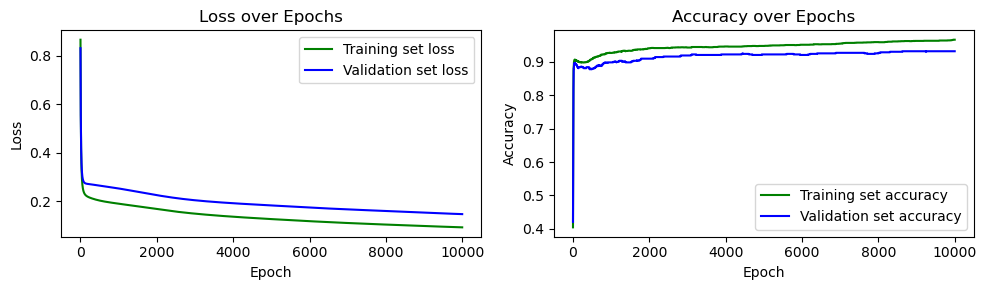

In [137]:
# Step 1: Load dataset
X, T = dataset("churn_data.csv", delimiter=",")

# Step 2: Split dataset
X_train, T_train, X_val, T_val = split_training_data(X, T, train_percentage=0.8)

# Step 3: Normalize input data
X_train, X_val = normalize(X_train, X_val)

# Step 4: Xavier Initialization of weights
K = 10                    # hidden layer size
D = X_train.shape[0] - 1  # input dimension (excluding bias)
O = 1                     # binary classification → 1 output

W1 = numpy.random.randn(K, D + 1) / np.sqrt(D + 1)
W2 = numpy.random.randn(O, K + 1) / np.sqrt(K + 1)

Theta = [W1, W2]

# Step 5: Train the network and collect results
results = train(
    X_train, T_train, X_val, T_val,
    Theta, loss_type='bce',
    epochs=10000, learning_rate=0.1
)

# Step 6: Plot results
plot(*results)


#### Task 2.12: Categorical Classification


1. Load the data for categorical classification, using the ``"winequality-red.csv"`` file.
2. Split the data into training and validation sets.
3. Normalize both training and validation input data using the function from Task 2.3.
4. **How many input and output neurons do we need?** Change the number of input, hidden, and output neurons accordingly. Select an appropriate number of hidden neurons $K$.
5. Instantiate the weight matrices $\Theta=(\mathbf W^{(1)}, \mathbf W^{(2)})$ using the Xavier method as introduced in the lecture
6. Train the network on the winequality-red dataset with the learning rate of **$\eta=0.1$** for 10'000 epochs and plot the training and validation accuracies and losses.



Loaded dataset with 1599 samples


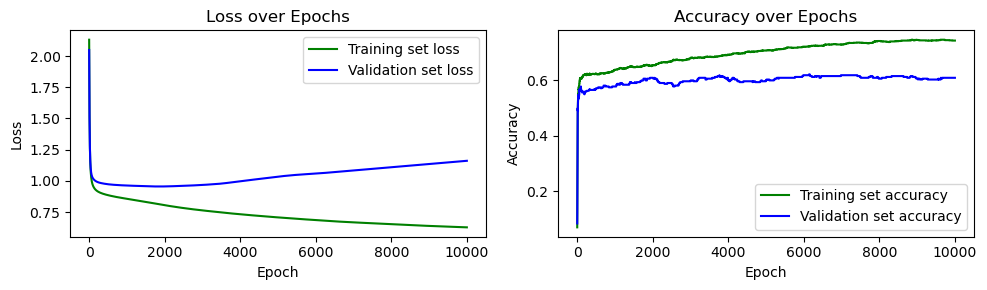

In [145]:
# Step 1: Load dataset
X, T = dataset("winequality-red.csv", delimiter=";")

# Step 2: Split dataset
X_train, T_train, X_val, T_val = split_training_data(X, T, train_percentage=0.8)

# Step 3: Normalize input data
X_train, X_val = normalize(X_train, X_val)

# Step 4: Define architecture
D = X_train.shape[0] - 1  # Input dimension (excluding bias)
K = 20                  # Hidden layer size (tunable)
O = T.shape[0]           # Output dimension = number of classes = 6

# Step 5: Xavier Initialization
W1 = numpy.random.randn(K, D + 1) / np.sqrt(D + 1)
W2 = numpy.random.randn(O, K + 1) / np.sqrt(K + 1)

Theta = [W1, W2]

# Step 6: Train the network
results = train(
    X_train, T_train, X_val, T_val,
    Theta, loss_type='cce',
    epochs=10000, learning_rate=0.1
)

# Step 7: Plot the results
plot(*results)
